In [2]:
#Voglio backtestare la strategia con parametri multipli e vedere come si comporta. Devo applicare la funzione di backtest
#e poi fare un plot dei risultati in 3d.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba as nb

#Now we import the script from the percentage fees version:
import sys
import os

script_directory = r'C:\Users\camere\Conda_3.11_enviroment\PythonMiniTutorials\trading strategies\MyOwnBacktester\main functions'
sys.path.append(script_directory)
import main_func_percentage as mf

In [5]:
data = pd.read_csv(r'C:\Users\camere\Conda_3.11_enviroment\CSV DATA\eurgbp-s1-bid-2024-01-01-2024-08-24.csv',
                   index_col=0, parse_dates=True)
close_price = data['close'].to_numpy()
print(close_price) #now i got a numpy array with the closing prices of the currency pair;

[0.86692 0.86705 0.86724 ... 0.84677 0.84679 0.84676]


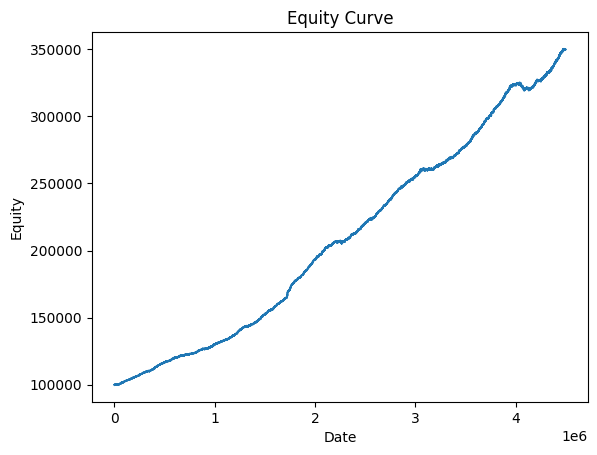

In [21]:



equity = pd.Series(equity)
equity.plot()
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve')
plt.show()